<a href="https://colab.research.google.com/github/Nlamje45/AI-Projects/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Step 1: Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv", encoding= 'unicode_escape')
d.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
d.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


***EDA Exploratory Data Analysis and Feature Engineering ***

No Missing values present!

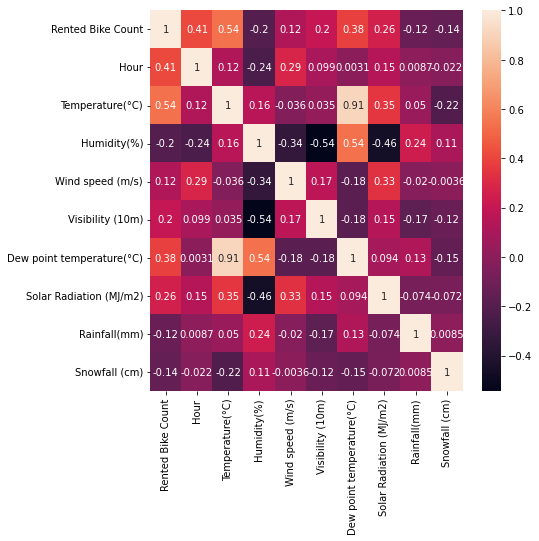

In [ ]:
co=d.corr()
plt.figure(figsize=(7,7))
g=sns.heatmap(d.corr(),annot=True)

High correlation in Temperature and dew point temperature which is obvious hence we can ignore any of the column hence we ignore dew point temperature.

In [ ]:
d["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

Also in Holiday and Functional day either of the one can be droped beccause if day is not functional then it is an holiday and vice versa.

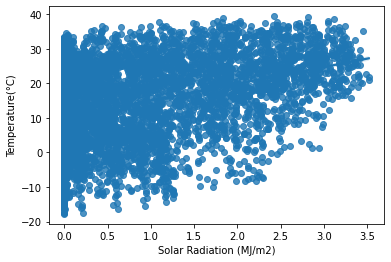

In [ ]:
sns.regplot(x="Solar Radiation (MJ/m2)", y="Temperature(°C)", data=d);

There is a relation in temperature and solar radiation which is obvious as temperature increses solar radiation also increases.

In [ ]:
k=d.drop(["Dew point temperature(°C)",'Holiday','Date'],axis=1)

In [ ]:
k.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Functioning Day'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


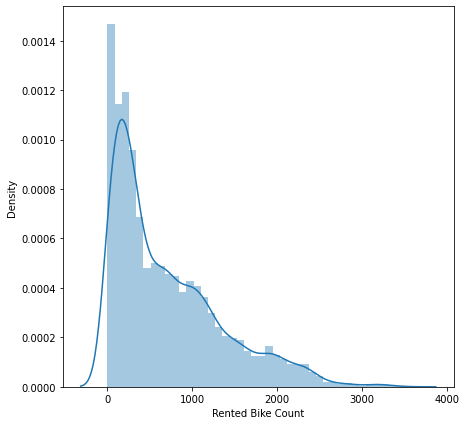

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(k['Rented Bike Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


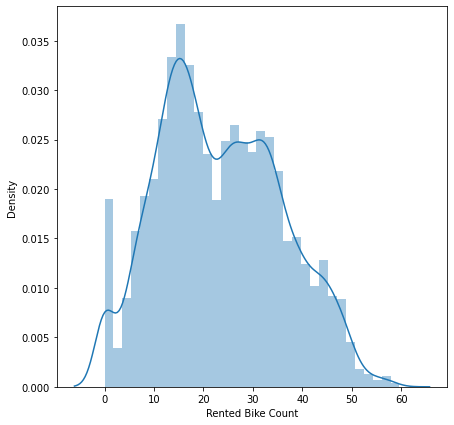

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(k['Rented Bike Count']))
k['Rented Bike Count']=np.sqrt(k['Rented Bike Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


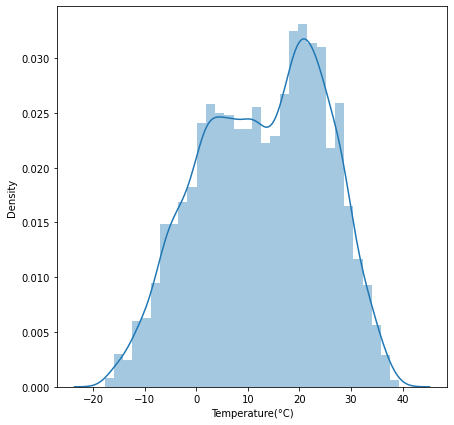

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(k['Temperature(°C)'])

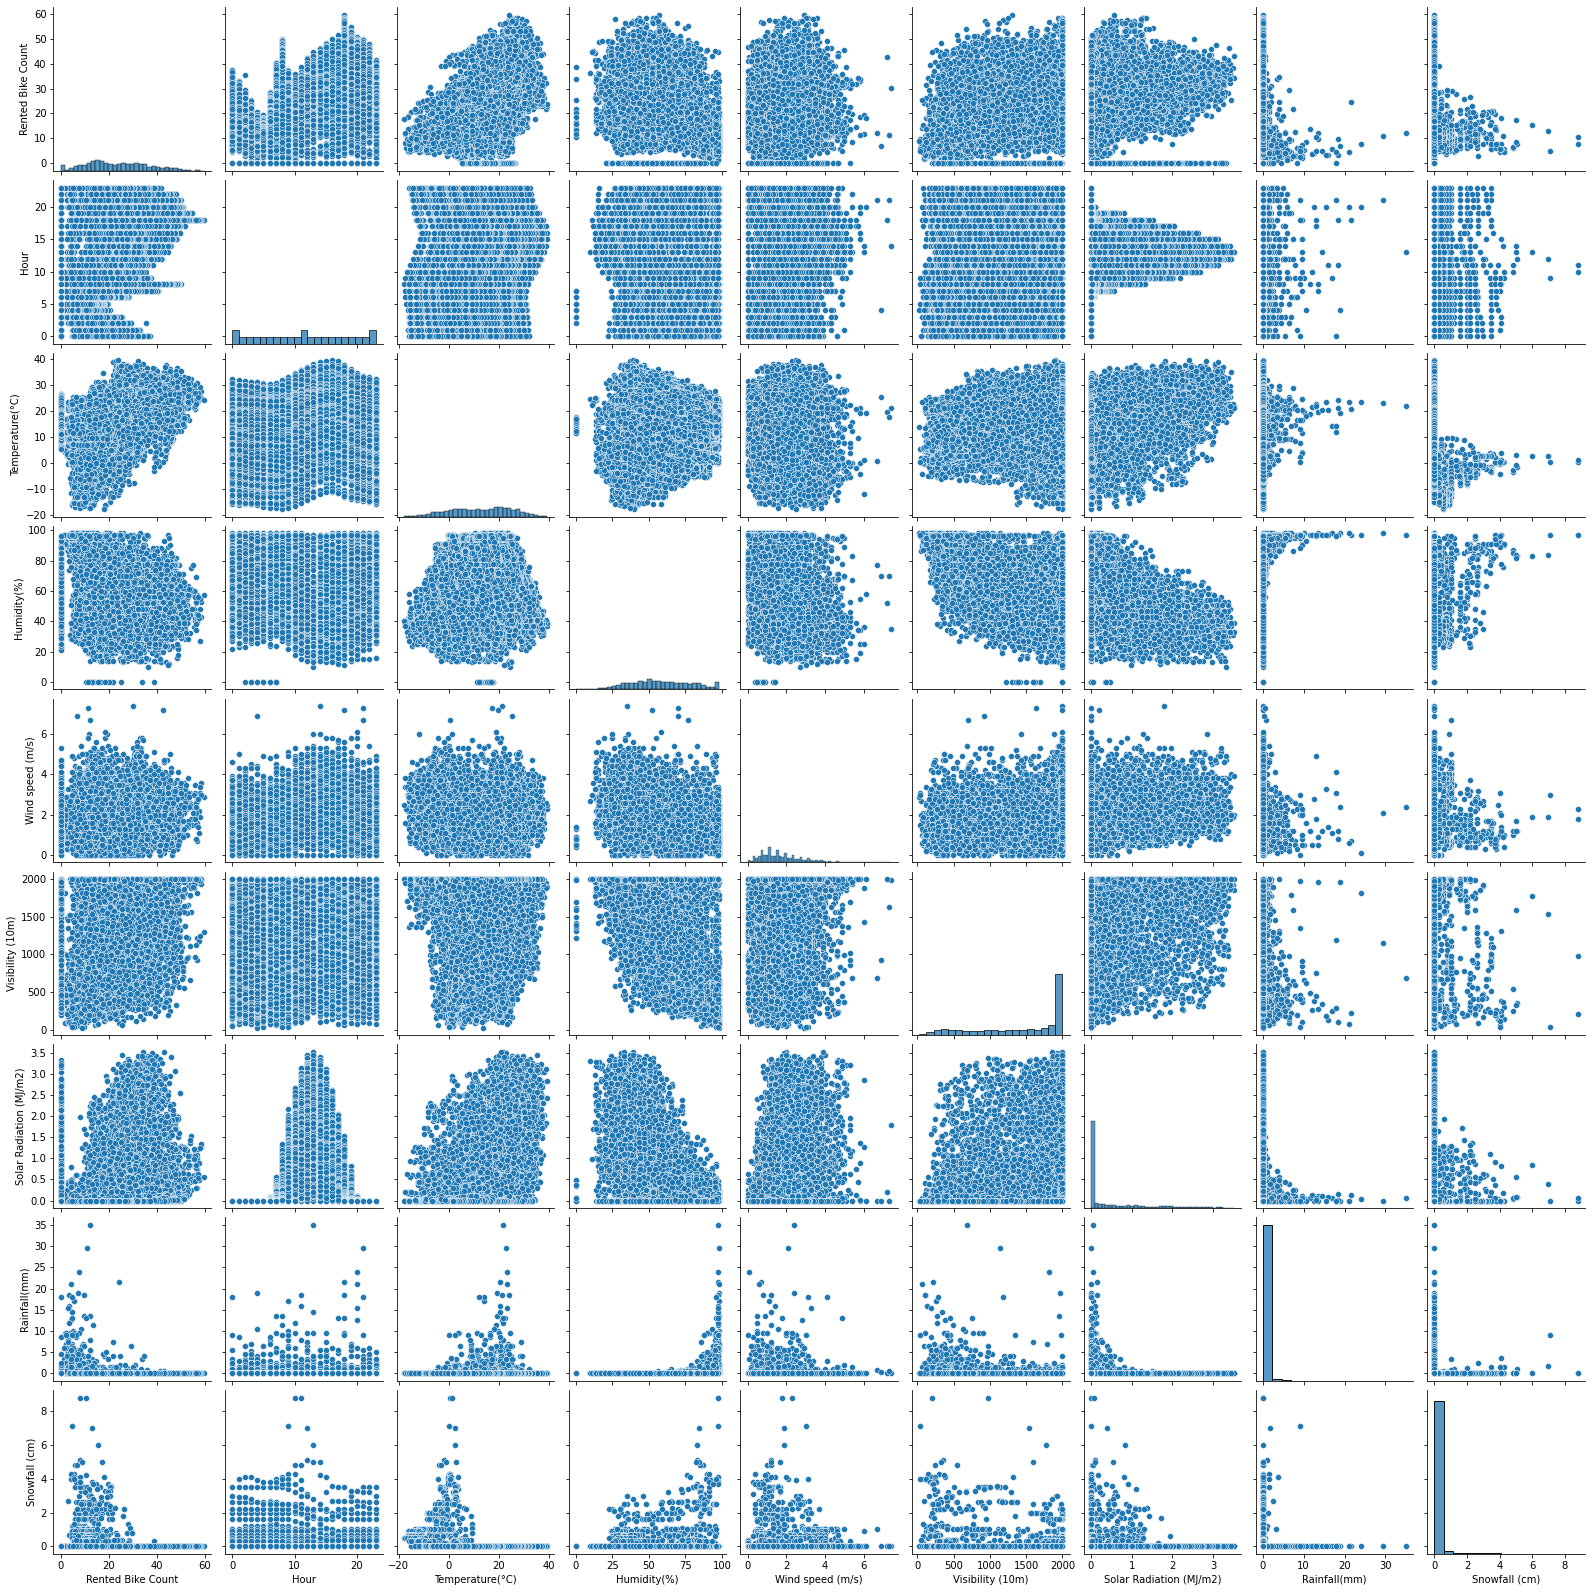

In [ ]:
sns.pairplot(k)

In [ ]:
dat=pd.get_dummies(k,drop_first=True)

In [ ]:
dat

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_Yes
0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1
1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1
2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1
3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1
4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31.670175,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,0,1
8756,27.640550,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,0,1
8757,26.343880,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,0,1
8758,26.683328,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,0,1


**Model Building**

In [ ]:
x=dat.drop(['Rented Bike Count'],axis=1)
y=dat['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score , r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [ ]:
m3=LinearRegression()
m3.fit(train_x,train_y)
p3=m3.predict(val_x)
e3=mean_absolute_error(val_y,p3)
e3=e3**2
print(e3)

30.861961856986646


In [ ]:
m1=DecisionTreeRegressor()
m1.fit(train_x,train_y)
p1=m1.predict(val_x)
e1=mean_absolute_error(val_y,p1)
e1=e1**2
print(e1)

12.698038239124028


In [ ]:
m2=RandomForestRegressor(n_estimators=50)
m2.fit(train_x,train_y)
p2=m2.predict(val_x)
e2=mean_absolute_error(val_y,p2)
e2=e2**2
print(e2)


7.192076311645354


In [ ]:
m4=XGBRegressor()
m4.fit(train_x,train_y)
p4=m4.predict(val_x)
e4=mean_absolute_error(val_y,p4)
e4=e4**2
print(e4)

[10:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
9.755987799650708


In [ ]:
params={
    "learning_rate":[0.05,0.10,0.15,0.2,0.25,0.3],
    "max_depth":[1,4,6,8,10,15] ,
    "min_child_weight":[1,3,5,7] ,
    "gamma":[0.1,0.2,0.3,0.4] ,
    "n_estimators":[100,200,300,400,500]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
r_s=RandomizedSearchCV(m4,param_distributions=params,n_iter=5,n_jobs=-1)
r_s.fit(train_x,train_y)
r_s.best_params_                                                                                                                                                                           
r_s.best_estimator_

[10:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=10, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
m4=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=10, min_child_weight=5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

m4.fit(train_x,train_y)
p4=m4.predict(val_x)
e4=mean_absolute_error(val_y,p4)
e4=e4**2
print(e4)

[10:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.2873191696348965


In [ ]:
params={

    "n_estimators":[50,100,200,300,400,500]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
r_s=GridSearchCV(m2,param_grid=params,n_jobs=-1)
r_s.fit(train_x,train_y)
r_s.best_params_                                                                                                                                                                           
r_s.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
m2=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
m2.fit(train_x,train_y)
p2=m2.predict(val_x)
e2=mean_absolute_error(val_y,p2)
e2=e2**2
print(e2)


7.012369849145606


Thus we get lowest error with random forest algorithm 

**Conclusion:** We have learnt how to solve regression problems and the algorithms associated with regression. 